# **What and Where are the World's Oldest Businesses**

An important part of business is planning for the future and ensuring that the business survives changing market conditions. Some businesses do this remarkably well and last for hundreds of years. In this project, you'll explore data from BusinessFinancing.co.uk on the world's oldest businesses: when were they founded, and which industries do they belong to?  

Like many business problems, the data we'll explore is contained in several different datasets. In order to understand the world's oldest businesses, we will first need to use joining techniques to merge our data. From there, we can use manipulation tools such as grouping and filtering to answer questions about these historic businesses.

# **SUMMARY OF QUESTIONS AND TASKS**

## **DATASET EXPLORATION**

TASK 1: JOINING ALL TABLES

TASK 2: INVESTIGATING MISSING DATA AND RANGE OF DATA POINTS

## **FIRST DISCOVERY - THE OLDEST BUSINESSES AND THOSE BEFORE 1,000 A.C.**

**Q3 IN**

**Q4**

## **FIRST IN-DEPTH ANALYSIS**

**Q5**

**Q6**

## **SECOND DISCOVERY**

**Q7**

**Q8**

**Q9**

**Q10**

## **<u>TASK 1: JOINING ALL TABLES</u>**

SInce the database is splitted into 3 tables, it is key to have a clear overview of the relevant fields and records and how they interact and give context to each other.

In [1]:
/* I decided to insert "TOP #" to reduce the redudancy of records
generated only for the sake of this project showcase. */
SELECT TOP 4 business, year_founded, category, country, continent
FROM businesses b
    JOIN categories c1
    ON b.category_code = c1.category_code
        JOIN countries c2
        ON b.country_code = c2.country_code

(4 rows affected)

Total execution time: 00:00:00.017

business,year_founded,category,country,continent
1st National Bank of St Lucia,1938,Banking & Finance,Saint Lucia,North America
Affligem Brewery,1074,"Distillers, Vintners, & Breweries",Belgium,Europe
Air Burkina,1967,Aviation & Transport,Burkina Faso,Africa
Air Madagascar,1962,Aviation & Transport,Madagascar,Africa


**COMMENT ON THE RESULT:** The dataset seem pretty clean and consistent with the fields making noticable sense when compiled.

## **<u>TASK 2: INVESTIGATING MISSING DATA AND RANGE OF DATA POINTS</u>**

### **SUBTASK 2-1: Checking for any empty / null values.**

In [20]:
SELECT -- Below it's a logic expression to return the total of any empty records in each key column.
    SUM(case when business is null then 1 else 0 end) AS business, 
    SUM(case when year_founded is null then 1 else 0 end) AS year_founded, 
    SUM(case when b.country_code is null then 1 else 0 end) AS country_code,
    SUM(case when country is null then 1 else 0 end) AS country,
    SUM(case when continent is null then 1 else 0 end) AS continent,
    SUM(case when b.category_code is null then 1 else 0 end) AS category_code,
    SUM(case when category is null then 1 else 0 end) AS category
FROM businesses b
    LEFT JOIN categories c1 ON b.category_code = c1.category_code
    LEFT JOIN countries c2  ON b.country_code = c2.country_code

(1 row affected)

Total execution time: 00:00:00.024

business,year_founded,country_code,country,continent,category_code,category
0,0,0,0,0,0,0


### **SUBTASK 2-2: Calculating summary statistics. What are the oldest and newest founding years?**

To calculate the extreme points of the YEAR\_FOUNDED field I will be applying a SELF-JOIN to enable me to make calculations and obtain different results from the same column.

In [34]:
SELECT MIN(b1.year_founded) AS minimum,
       MAX(b2.year_founded) AS maximum,
       AVG(b3.year_founded) AS median,
       ROUND(STDEVP(b4.year_founded),2) AS standard_deviation
FROM businesses b1
    JOIN businesses b2 -- (SELF-JOIN 1 for maximum value)
    ON b1.business = b2.business
    JOIN businesses b3 -- (SELF-JOIN 2 for median value)
    ON b2.business = b3.business
    JOIN businesses b4 -- (SELF-JOIN 3 for standard deviation)
    ON b3.business = b4.business

(1 row affected)

Total execution time: 00:00:00.016

minimum,maximum,median,standard_deviation
578,1999,1775,275.86


**COMMENT ON THE RESULT:** It seems that there is a high variation between countries. In one country, the oldest business was only founded in 1999. By contrast, the oldest business in the world was founded back in 578. That's pretty incredible that a business has survived for more than a millennium.

### **Q2) How many and which businesses were founded before 1000?**

In [14]:
SELECT *
FROM businesses
WHERE year_founded < 1000
ORDER BY year_founded

(6 rows affected)

Total execution time: 00:00:00.015

business,year_founded,category_code,country_code
Kongo Gumi,578,CAT6,JPN
St. Peter Stifts Kulinarium,803,CAT4,AUT
Staffelter Hof Winery,862,CAT9,DEU
Monnaie de Paris,864,CAT12,FRA
The Royal Mint,886,CAT12,GBR
Sean's Bar,900,CAT4,IRL


In [28]:
SELECT b.business, b.year_founded, c2.country, c1.category
FROM businesses b
    JOIN categories c1
    ON b.category_code = c1.category_code
         JOIN countries c2
         ON b.country_code = c2.country_code
WHERE b.year_founded < 1000
ORDER BY b.year_founded;

(6 rows affected)

Total execution time: 00:00:00.030

business,year_founded,country,category
Kongo Gumi,578,Japan,Construction
St. Peter Stifts Kulinarium,803,Austria,"Cafés, Restaurants & Bars"
Staffelter Hof Winery,862,Germany,"Distillers, Vintners, & Breweries"
Monnaie de Paris,864,France,Manufacturing & Production
The Royal Mint,886,United Kingdom,Manufacturing & Production
Sean's Bar,900,Ireland,"Cafés, Restaurants & Bars"


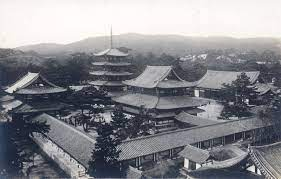

With that extra detail about the oldest businesses, we can see that Kongō Gumi is a construction company. Kongō Gumi was the oldest continuously operating company in the world. Founded in Japan a mere century after the fall of the Roman Empire, it survived extreme changes in Japan’s culture, government and economy, preserving traditional construction techniques and family values for over 1,400 years.

In that list of six businesses, we also see a café, a winery, and a bar. The two companies recorded as "Manufacturing and Production" are both mints. That is, they produce currency.

## **TASK 3: What are most the long standing categories?**

In [64]:
SELECT TOP 5 category, COUNT(b.business) AS n
FROM categories c
    JOIN businesses b
    ON c.category_code = b.category_code
GROUP BY category
ORDER BY n DESC

(5 rows affected)

Total execution time: 00:00:00.058

category,n
Banking & Finance,37
"Distillers, Vintners, & Breweries",22
Aviation & Transport,19
Postal Service,16
Manufacturing & Production,15


In [31]:
SELECT continent, MIN(year_founded) AS oldest
FROM businesses b
    JOIN countries c
    ON b.country_code = c.country_code
GROUP BY continent
ORDER BY oldest

(6 rows affected)

Total execution time: 00:00:00.012

continent,oldest
Asia,578
Europe,803
North America,1534
South America,1565
Africa,1772
Oceania,1809


In [41]:
SELECT continent, country, category, business, year_founded
FROM businesses b JOIN countries c1
ON b.country_code = c1.country_code
    JOIN categories c2 ON b.category_code = c2.category_code
WHERE year_founded IN
                     -- START OF SUBQUERY 1 
                    (SELECT MIN(year_founded)
                     FROM -- Start of Subquery 2
                        (SELECT continent, business, year_founded
                         FROM businesses b JOIN countries c
                         ON b.country_code = c.country_code) AS subquery
                          -- End of Subquery 2
                     GROUP BY continent)
                     -- END OF SUBQUERY 1
ORDER BY year_founded;

(6 rows affected)

Total execution time: 00:00:00.041

continent,country,category,business,year_founded
Asia,Japan,Construction,Kongo Gumi,578
Europe,Austria,"Cafés, Restaurants & Bars",St. Peter Stifts Kulinarium,803
North America,Mexico,Manufacturing & Production,La Casa de Moneda de México,1534
South America,Peru,Banking & Finance,Casa Nacional de Moneda,1565
Africa,Mauritius,Postal Service,Mauritius Post,1772
Oceania,Australia,Postal Service,Australia Post,1809


### **Q?) Which are the most common categories for the oldest businesses on each continent?**

Having businesses joined to categories and countries together means we can ask questions about both these things together.

In [ ]:
SELECT continent, category, COUNT(business) AS n
FROM businesses b
    JOIN categories c1
    ON b.category_code = c1.category_code
        JOIN countries c2
        ON b.country_code = c2.country_code
GROUP BY continent, category
HAVING COUNT(business) > 5
ORDER BY n DESC

In [19]:
SELECT TOP 10 business, category, year_founded
FROM businesses b
    JOIN categories c
    ON b.category_code = c.category_code
WHERE country_code IN
              (SELECT country_code FROM countries
               WHERE continent = 'Africa')
ORDER BY year_founded   

(10 rows affected)

Total execution time: 00:00:00.025

business,category,year_founded
Mauritius Post,Postal Service,1772
NamPost,Postal Service,1814
Premier FMCG,Manufacturing & Production,1820
La Poste Tunisienne,Postal Service,1847
Correios de Cabo Verde,Postal Service,1849
Egyptian National Railways,Aviation & Transport,1854
Hamoud Boualem,Food & Beverages,1878
La Poste du Togo,Postal Service,1883
Société nationale des Chemins de fer du Congo,Aviation & Transport,1889
Beira Railroad Corporation,Aviation & Transport,1892


In [1]:
SELECT  continent, category, COUNT(business) AS n
FROM businesses b
    JOIN categories c1
    ON b.category_code = c1.category_code
        JOIN countries c2
        ON b.country_code = c2.country_code
GROUP BY continent, category
HAVING COUNT(business) > 5
ORDER BY n DESC

(7 rows affected)

Total execution time: 00:00:00.103

continent,category,n
Africa,Banking & Finance,17
Europe,"Distillers, Vintners, & Breweries",12
Africa,Aviation & Transport,10
Africa,Postal Service,9
Europe,Manufacturing & Production,8
Asia,Aviation & Transport,7
Asia,Banking & Finance,6


hi

  ![title](.\datasets\visual1.jpg)

In [3]:
SELECT country, category, business, year_founded
FROM businesses b
    JOIN categories c1
    ON b.category_code = c1.category_code
        JOIN countries c2
        ON b.country_code = c2.country_code
WHERE continent = 'Asia'
ORDER BY year_founded

(42 rows affected)

Total execution time: 00:00:00.020

country,category,business,year_founded
Japan,Construction,Kongo Gumi,578
China,"Cafés, Restaurants & Bars",Ma Yu Ching's Bucket Chicken House,1153
Turkey,Tourism & Hotels,Çemberlitas Hamami,1584
India,Manufacturing & Production,Wadia Group,1736
Malaysia,Postal Service,Pos Malaysia,1800
Indonesia,Defense,Pindad,1808
Singapore,Postal Service,Singapore Post,1819
Bangladesh,Food & Beverages,M. M. Ispahani Limited,1820
Lebanon,Banking & Finance,Bank Audi,1830
Sri Lanka,Food & Beverages,George Steuart Group,1835


In [79]:
SELECT business, continent, category, year_founded
FROM businesses b
    JOIN categories c1
    ON b.category_code = c1.category_code
        JOIN countries c2
        ON b.country_code = c2.country_code
WHERE category = 'Banking & Finance'
AND business NOT LIKE '%Bank%'
ORDER BY year_founded

(7 rows affected)

Total execution time: 00:00:00.034

business,continent,category,year_founded
Casa Nacional de Moneda,South America,Banking & Finance,1565
Banco Nacional de Bolivia,South America,Banking & Finance,1871
HSBC El Salvador,North America,Banking & Finance,1891
Standard Chartered Zimbabwe,Africa,Banking & Finance,1892
KCB Group Limited,Africa,Banking & Finance,1896
Banque Internationale pour la Centrafrique,Africa,Banking & Finance,1946
European Trust Company,Oceania,Banking & Finance,1991


### **Q?) Joining everything for further analysis**